# COMPOSITING COLOR PALETTES AND RAW IMAGES

In [20]:
import pandas as pd
import numpy as np
import ast
import PIL
from pathlib import Path
import glob
from PIL import Image
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

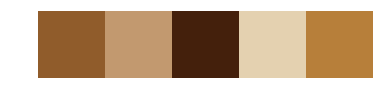

In [4]:
color_knoxcounty = pd.read_csv("./Instagram/colors_knoxcounty.csv", index_col = 0, converters={"Color1": ast.literal_eval,
                                                                                                 "Color2": ast.literal_eval,
                                                                                                 "Color3": ast.literal_eval,
                                                                                                 "Color4": ast.literal_eval,
                                                                                                 "Color5": ast.literal_eval,
                                                                                                 "HSL1": ast.literal_eval,
                                                                                                 "HSL2": ast.literal_eval,
                                                                                                 "HSL3": ast.literal_eval,
                                                                                                 "HSL4": ast.literal_eval,
                                                                                                 "HSL5": ast.literal_eval})
color_knoxcounty_plt = color_knoxcounty.loc[:, "Color1":"HSL5"]

fs = []

for i in range(len(color_knoxcounty_plt)):
    palette = list(color_knoxcounty_plt.loc[i, "Color1":"Color5"])
    palette = np.array(palette)[np.newaxis, :, :]
    plt.imshow(palette.astype(np.uint8));
    plt.axis('off');
    plt.savefig("./Instagram/knoxcounty/cpimages/cp_{}".format(i))
    #plt.show();
    im = Image.open('./Instagram/knoxcounty/cpimages/cp_{}.png'.format(i),'r')
    fs.append(im)
    
# get the image size
x,y = fs[0].size
ncol = 9
nrow = 9
cvs = Image.new('RGB',(x*ncol,y*nrow))

for i in range(len(fs)):
    px, py = x*int(i/nrow), y*(i%nrow)
    cvs.paste(fs[i],(px,py))

cvs.save('./Instagram/cp_knoxcounty.png',format='png')

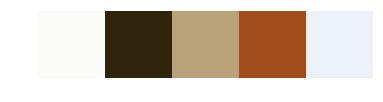

In [27]:
cvs = Image.new('RGB', (1,1))
color_utkgeography = pd.read_csv("./Instagram/colors_utkgeography.csv", index_col = 0, converters={"Color1": ast.literal_eval,
                                                                                                 "Color2": ast.literal_eval,
                                                                                                 "Color3": ast.literal_eval,
                                                                                                 "Color4": ast.literal_eval,
                                                                                                 "Color5": ast.literal_eval,
                                                                                                 "HSL1": ast.literal_eval,
                                                                                                 "HSL2": ast.literal_eval,
                                                                                                 "HSL3": ast.literal_eval,
                                                                                                 "HSL4": ast.literal_eval,
                                                                                                 "HSL5": ast.literal_eval})
color_utkgeography_plt = color_utkgeography.loc[:, "Color1":"HSL5"]


## Online help for combining multiple plot outputs: https://pythonmatplotlibtips.blogspot.com/2017/12/arrange-multiple-images-in-one-large-image.html
fs = []

for i in range(len(color_utkgeography_plt)):
    palette = list(color_utkgeography_plt.loc[i, "Color1":"Color5"])
    palette = np.array(palette)[np.newaxis, :, :]
    plt.imshow(palette.astype(np.uint8));
    plt.axis('off');
    plt.savefig("./Instagram/utkgeography/cpimages/cp_{}".format(i))
    #plt.show();
    im = Image.open('./Instagram/utkgeography/cpimages/cp_{}.png'.format(i),'r')
    fs.append(im)
    
# get the image size
x,y = fs[0].size
ncol = 9
nrow = 11
cvs = Image.new('RGB',(x*ncol,y*nrow))

for i in range(len(fs)):
    px, py = x*int(i/nrow), y*(i%nrow)
    cvs.paste(fs[i],(px,py))

cvs.save('./Instagram/cp_utkgeography.png',format='png')

In [10]:
filenames = ["utknoxville",
             "utkgeography",
             "tennessee",
             "knoxcounty",
             "downtownknoxville",
             "outdoors",
             "nourishknoxville",
             "sunrisesupermarket",
             "religion",
             "knoxvillepolice"]

files = list()

for i in range(len(filenames)):
    pathlist = Path("./Instagram/{}".format(filenames[i])).glob('**/*.jpg')
    
    for path in pathlist:
        files.append(path)
        
    imgs = [ PIL.Image.open(y) for y in files ]
    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

    # save that beautiful picture
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    imgs_comb.save( '{}.jpg'.format(filenames[i]) )
    files = []

# for a vertical stacking it is simple: use vstack
#imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
#imgs_comb = PIL.Image.fromarray( imgs_comb)
#imgs_comb.save( 'Trifecta_vertical.jpg' )

C:\Users\jfeng\Anaconda3\envs\Instagram\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [13]:
for i in range(len(filenames)):
    pathlist = Path("./Instagram/{}".format(filenames[i])).glob('**/*.jpg')
    
    for path in pathlist:
        files.append(path)
    
    imgs = [ PIL.Image.open(y) for y in files ]
    pil_grid(imgs)
    

In [37]:
#### COMPOSITE ALL IMAGES: https://python-forum.io/Thread-Combine-images-using-Pillow-and-Python

def create_collage(files, out):
    # You can add a check to guarantee that the list of images is not bigger than 64...
    target_img = Image.new("RGB", (800, 800))
    for k, png in enumerate(files):
        row, col = divmod(k, 8)
        img = Image.open(png)
        img.thumbnail((100, 100))
        target_img.paste(img, (100*row, 100*col))
 
    target_img.save(out)

In [42]:
for i in range(len(filenames)):
    files = glob.glob('./Instagram/{}/*.jpg'.format(filenames[i]))
    create_collage(files, "./Instagram/{}.png".format(filenames[i]))